In [ ]:
%%bash
pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%%bash
pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from google.colab import drive
from google.colab.patches import cv2_imshow
drive.mount('/content/drive')
import cv2

Mounted at /content/drive


In [ ]:
#Вырезаем из скриншота область с отпечатком
input_file_name = "orig/4.jpg"
output_file_name = "cutting/4.png"
resim = cv2.imread("/content/drive/MyDrive/images/" + input_file_name)

Area = resim[139:1110, 207:1393]
cv2.imwrite("/content/drive/MyDrive/images/" + output_file_name, Area)

True

In [ ]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 68.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 63.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 82.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
#Удаляем задний фон
from rembg import remove
import cv2

input_path = "/content/drive/MyDrive/images/png/500_1(g f).jpg"
output_path = "/content/drive/MyDrive/images/rembg/500_1(g f).jpg"

input = cv2.imread(input_path)
output = remove(input)
cv2.imwrite(output_path, output)

100%|███████████████████████████████████████| 176M/176M [00:00<00:00, 48.1GB/s]


True

In [2]:
# import the necessary packages
from scipy.spatial import distance as dist
from imutils import perspective
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2

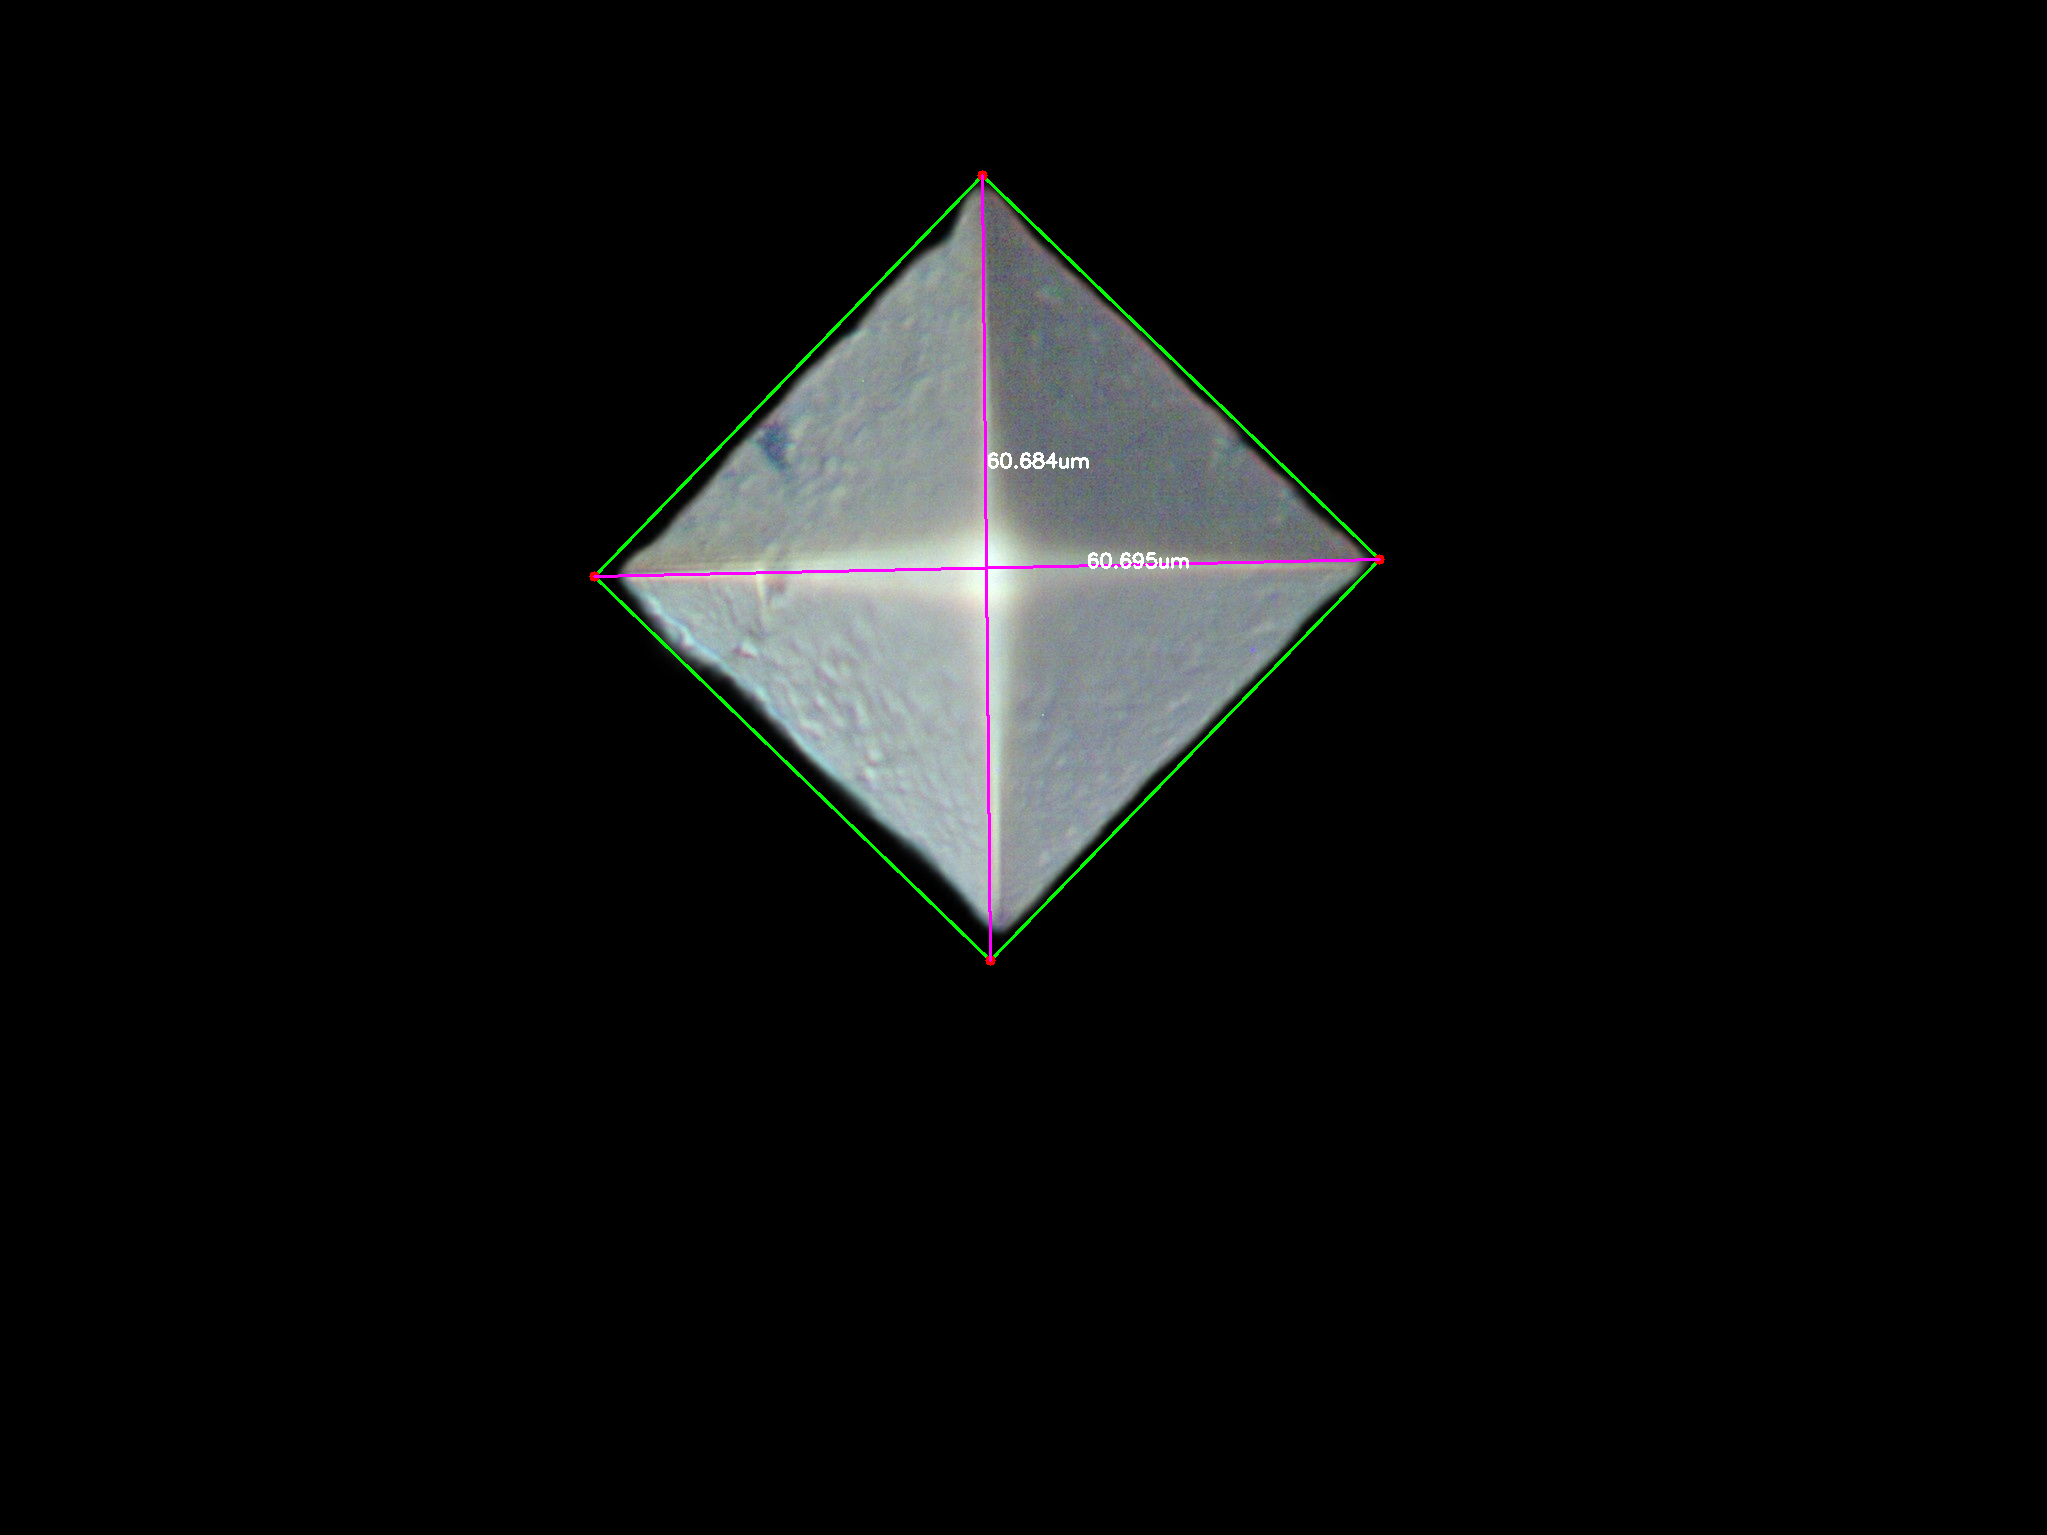

In [91]:
# загрузка изображения и изменения цвета изображения на серый
image = cv2.imread("/content/drive/MyDrive/images/rembg/500_1(g f).jpg")

# image = cv2.fastNlMeansDenoisingColored(image, None, 10, 10, 7, 21)
#image = image * 2
#cv2_imshow(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#gray = r
gray = cv2.GaussianBlur(gray, (5, 5), 0)
gray = cv2.blur(gray, (4, 4))
gray = gray * 3
# perform edge detection, then perform a dilation + erosion to
# close gaps in between object edges
edged = cv2.Canny(gray, 75, 75)
edged = cv2.dilate(edged, None, iterations=2)
# edged = cv2.erode(edged, None, iterations=1)

contours = imutils.grab_contours(cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE))
pixelsPerMetric = 0.0773 #масштаб в приложении 1:0,0773 мкм

def midpoint(ptA, ptB):
	return ((ptA[0] + ptB[0]) * 0.5, (ptA[1] + ptB[1]) * 0.5)

for c in contours:
	# if the contour is not sufficiently large, ignore it
	if cv2.contourArea(c) < 100:
		continue
	# compute the rotated bounding box of the contour
	orig = image.copy()
	box = cv2.minAreaRect(c)
	box = cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box)
	box = np.array(box, dtype="int")
	# order the points in the contour such that they appear
	# in top-left, top-right, bottom-right, and bottom-left
	# order, then draw the outline of the rotated bounding
	# box
	box = perspective.order_points(box)
	cv2.drawContours(orig, [box.astype("int")], -1, (0, 255, 0), 2)
	# loop over the original points and draw them
	for (x, y) in box:
		cv2.circle(orig, (int(x), int(y)), 5, (0, 0, 255), -1)
  
  # unpack the ordered bounding box, then compute the midpoint
	# between the top-left and top-right coordinates, followed by
	# the midpoint between bottom-left and bottom-right coordinates
	(tl, tr, br, bl) = box
	# draw the midpoints on the image
	# draw lines between the midpoints
	cv2.line(orig, (int(tl[0]), int(tl[1])), (int(br[0]), int(br[1])),
		(255, 0, 255), 2)
	cv2.line(orig, (int(tr[0]), int(tr[1])), (int(bl[0]), int(bl[1])),
		(255, 0, 255), 2)
 
 	# compute the Euclidean distance between the midpoints
	dA = dist.euclidean(tl, br)
	dB = dist.euclidean(tr, bl)
	# if the pixels per metric has not been initialized, then
	# compute it as the ratio of pixels to supplied metric
	# (in this case, inches)

  # compute the size of the object
	dimA = dA * pixelsPerMetric
	dimB = dB * pixelsPerMetric
	# draw the object sizes on the image
  #Вычисляю середину диагонали для отрисовки
	(tlbrX, tlbrY) = midpoint(tl, br)
	(trblX, trblY) = midpoint(tr, bl)
 
	cv2.putText(orig, "{:.3f}um".format(dimA),
		(int(tlbrX), int(tlbrY - 100)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
	cv2.putText(orig, "{:.3f}um".format(dimB),
		(int(trblX + 100), int(trblY)), cv2.FONT_HERSHEY_SIMPLEX,
		0.65, (255, 255, 255), 2)
	# show the output image
	cv2_imshow(orig)
	cv2.waitKey(0)

In [82]:
dimA

60.68365163574218

In [84]:
dimB

60.69472954101562